# ISE 447 - Financial Optimization - HW 1

Due Date: Monday February 28th, 2022  
Total: 90 Points  
*Note*: Under otherwise stated, all textbook references are for “Optimization Methods in Finance”

In [68]:
#Packages used in this work
import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

## Problem 1 (10 points)  
LP Graphical Solution Method: Reconsider the bank/Basel III Accord problem considered in class. Using the LP Graphical Solution Method you learned in your previous optimization course, solve this 2-decision variable problem with the following values for the problem parameters:
$$r_1 = \frac{1}{6}, r_2 = \frac{1}{10}, r_3 = \frac{1}{6}, r_4 = \frac{2}{3}, \alpha = \frac{1}{3}, m_D = 0.02, m_L = 0.03$$  
Provide a plot of the problems feasible solution (use a grid where each mark represents $\frac{1}{10}$). Provide the argument(s) that lead you to the problem’s optimal solution (Hint: You can check if your solution is right by using AMPL, EXCEL, Matlab, etc., to solve the problem.)


### Solution

Text(0, 0.5, 'Loans')

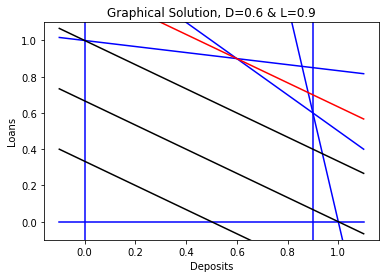

In [143]:
x = np.linspace(-0.1, 1.1, num=12)

r1 = 1/6
r2 = 1/10
r3 = 1/6
r4 = 2/3
alpha = 1/3
mD = 0.02
mL = 0.03

plt.axes(ylim=[-0.1,1.1])
plt.plot(x, (1-x)/r1, 'b')              # Capital Ratio
plt.axvline(x=1-r2, color = 'b')        # Leverage Ratio
plt.plot(x, 1-r3*x, 'b')                # Liquidity Coverage Ratio
plt.plot(x, (1-(1-alpha)*x)/r4, 'b')    # Net Stable Funding Ratio
plt.axvline(x=0, color = 'b')           # Non Negativity
plt.plot(x,np.zeros(12), 'b')           # Non Negativity
plt.plot(x, (0.01-mD*x)/mL, 'k')
plt.plot(x, (0.02-mD*x)/mL, 'k')
plt.plot(x, (0.03-mD*x)/mL, 'k')
plt.plot(x, (0.039-mD*x)/mL, 'r')
plt.title('Graphical Solution, D=0.6 & L=0.9')
plt.xlabel('Deposits')
plt.ylabel('Loans')

## Problem 2 (30 Points) - Statistical Analysis

The purpose of this problem is to make a statistical out-of-sample analysis of the optimal solution of the Stock/Bond/Call portfolio investment problem considered in class. For that purpose, it is ok to use any software tool you see fit (i.e., EXCEL, Matlab, Python, etc.). Let $s_k$ for $k\in\{1,2,3\}$ be the value of the stock in the future in scenario $k$ (i.e., $s_1=40$, $s_2=20$, $s_3=12$). Now, add uncertainty to scenario values as follows $s^j_k=s_k+\epsilon^j_k$ where $\epsilon^j_k\sim\mathcal{N}(0, \sigma)$ for $k\in\{1,2,3\}$ and $j\in\{1,2,\dots,M\}$ where $M$ is the number of sample used in the out-of-sample analysis (use a value of $M$ larger than or equal to $30$ to get statistically significant results), and $X\sim\mathcal{N}(0,\sigma)$ is a normal random variable with mean zero and standard deviation $\sigma$.  

### Part A (10 Points) - Optimal Portfolio  
Choose a value of $\sigma$ that seems reasonable for you. Find the net profit obtained out of the optimal portfolio $S^∗ = 3500$, $B^∗ = 0$, $C_+^∗ = 0$, $C_−^∗ = 5000$ for samples $j\in\{1,\dots,M\}$ with $M\geq30$. Using these values, plot a histogram showing the distribution of the out-of-sample net profit of the optimal portfolio, compute its expected out-of-sample net profit and associated standard deviation.

### Part B (10 Points) - Alternative Portfolio  
We want to now compare the out-of-sample performance of the optimal portfolio with a “rule-of-thumb” portfolio of your choice. Your portfolio should not sell call options; that is, your portfolio should only invest the budget in buying stocks, bonds, and call options. For example your portfolio might be obtained by investing 70% of the budget in stocks and $30\%$ of the budget in bonds, or you might use $33\%$ of the money for each stocks, bonds, and calls. Choose a portfolio and briefly (a couple sentences justify your choice). Then, perform the same out-of-sample performance experiment you did for the optimal portfolio $S^∗ = 3500$, $B^∗ = 0$, $C_+^∗ =0$, $C_−^∗ = 5000$ (it is better if you use the same values $\epsilon^j_k\sim\mathcal{N}(0, \sigma)$, for $k\in\{1,2,3\}$ and $j\in\{1,2,\dots,M\}$ for both experiments). As before, generate a histogram showing the distribution of the out-of-sample net profit of the rule-of-thumb portfolio, compute its expected out-of-sample net profit and associated standard deviation.

### Part C (10 Points) - Comparison  
Using the results obtained thus far (histogram, expected net profit, standard deviation), briefly state how the portfolios compare. To finish, we want to know if any difference in the expected net profit of the two portfolios considered is statistically significant. For this purpose, call $\mu^*$ the expected net profit of the optimal portfolio, and $\mu^0$ the expected net profit of the rule-of-thumb portfolio. Now (using the software of your choice, or by hand) perform a difference of population means between the expected net profit of both portfolios at a significance level of $\alpha = 0.05$ to accept or reject the Null Hypothesis 
$$\begin{cases}
\mathrm{H}_0: \mu^* \geq \mu^0 \\
\mathrm{H}_1: \mu^* < \mu^0
\end{cases}$$
Use any source you see fit to remember of find out how this test is performed. Make sure you state what assumptions you made in performing your test. What is the answer of your test and what does it mean?


### Solution to Part A

The Out-Of-Sample expected return is 103.33%
The Out-Of-Sample standard deciation is 91.94%
The Portfolio Sharpe Ratio is 1.00


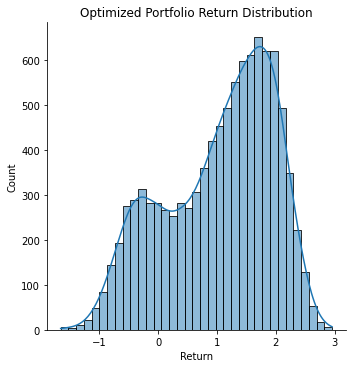

In [69]:
'''Security Initial Values'''
s0 = 20
b0 = 90
c0 = 10
k  = 15

'''Given Stock & Bond Ending Values'''
s_bear = 12 # Bear case, stock ends at 12
s_base = 20 # Base case, stock ends at 20
s_bull = 40 # Bull case, stock ends at 40
b_end = 100

'''assumed case probability'''
p_base = 1/3
p_bull = 1/3
p_bear = 1/3

'''Chosen Stock Standard Deviation'''
sigma = 10

'''Optimal Portfolio Assumed -- s is stock, b is bond, c is call (long or short)'''
s=3500
b=0
cl = 0
cs = 5000

'''Samples considered'''
M = 10000   # A true Monte-Carlo sim

'''Random Prices -- NOTE prices cannot be less than 0, this is adjusted for'''
s_bear = s_bear + np.random.normal(loc=0,scale=sigma,size=M)
s_bear[s_bear < 0] = 0
s_base = s_base + np.random.normal(loc=0,scale=sigma,size=M)
s_base[s_base < 0] = 0
s_bull = s_bull + np.random.normal(loc=0,scale=sigma,size=M)
s_bull[s_bull < 0] = 0

'''Option value at expiry'''
option_payoff_bear = s_bear - k
option_payoff_bear[option_payoff_bear < 0] = 0
option_payoff_base = s_base - k
option_payoff_base[option_payoff_base < 0] = 0
option_payoff_bull = s_bull - k
option_payoff_bull[option_payoff_bull < 0] = 0

'''Portfolio values at initial entry and at expiry cases'''
portfolio_val_init = s * s0 + b * b0 + (cl - cs) * c0
portfolio_val_bear = s * s_bear + b * b_end + (cl - cs) * option_payoff_bear
portfolio_val_base = s * s_base + b * b_end + (cl - cs) * option_payoff_base
portfolio_val_bull = s * s_bull + b * b_end + (cl - cs) * option_payoff_bull

'''Dataframe for values with calculated mean'''
portfolio_cases = pd.DataFrame(columns=['bear', 'base', 'bull'])
portfolio_cases['bear'] = portfolio_val_bear / portfolio_val_init - 1
portfolio_cases['base'] = portfolio_val_base / portfolio_val_init - 1
portfolio_cases['bull'] = portfolio_val_bull / portfolio_val_init - 1
portfolio_cases['mean'] = p_bull * portfolio_cases['bull'] + p_base * portfolio_cases['base'] + p_bear + portfolio_cases['bear']

opt_mean = portfolio_cases['mean'].mean()
opt_std = portfolio_cases['mean'].std()
print('The Out-Of-Sample expected return is {:.2%}'.format(opt_mean))
print('The Out-Of-Sample standard deciation is {:.2%}'.format(opt_std))
print('The Portfolio Sharpe Ratio is {:.2f}'.format((opt_mean - (b_end/b0 - 1)) / opt_std))

'''Plotted Result'''
ax = sns.displot(portfolio_cases['mean'], kde=True)
ax.set(xlabel='Return', title='Optimized Portfolio Return Distribution')
plt.show()

### Solution to Part B

I selected a portfolio consisting of $40\%$ stocks, $50\%$ bonds, and $10\%$ call options.  I chose this because I wished to decrease portfolio risk (standard deviation) since only half the portfolio is subject to risky assets.  That said, due to the nature of call options, the portfolio is slightly levered and will still be subject to price risk.

The Out-Of-Sample expected return is 36.88%
The Out-Of-Sample standard deciation is 25.96%
The Portfolio Sharpe Ratio is 0.99


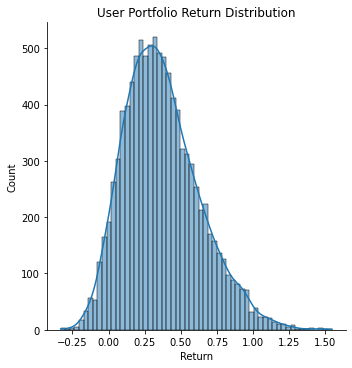

In [70]:
'''Portfolio Allocation -- Portfolio Initial Value is Bankroll'''
s_alloc = 0.4
b_alloc = 0.5
c_alloc = 0.1
s_units = np.floor((portfolio_val_init * s_alloc) / s0)
b_units = np.floor((portfolio_val_init * b_alloc) / b0)
c_units = np.floor((portfolio_val_init * c_alloc) / c0)

'''Portfolio values at initial entry and at expiry cases'''
user_portfolio_val_init = s_units * s0 + b_units * b0 + c_units * c0
user_portfolio_val_bear = s_units * s_bear + b_units * b_end + c_units * option_payoff_bear
user_portfolio_val_base = s_units * s_base + b_units * b_end + c_units * option_payoff_base
user_portfolio_val_bull = s_units * s_bull + b_units * b_end + c_units * option_payoff_bull

'''Dataframe for values with calculated mean'''
user_portfolio_cases = pd.DataFrame(columns=['bear', 'base', 'bull'])
user_portfolio_cases['bear'] = user_portfolio_val_bear / user_portfolio_val_init - 1
user_portfolio_cases['base'] = user_portfolio_val_base / user_portfolio_val_init - 1
user_portfolio_cases['bull'] = user_portfolio_val_bull / user_portfolio_val_init - 1
user_portfolio_cases['mean'] = p_bull * user_portfolio_cases['bull'] + p_base * user_portfolio_cases['base'] + p_bear + user_portfolio_cases['bear']

user_mean = user_portfolio_cases['mean'].mean()
user_std = user_portfolio_cases['mean'].std()
print('The Out-Of-Sample expected return is {:.2%}'.format(user_mean))
print('The Out-Of-Sample standard deciation is {:.2%}'.format(user_std))
print('The Portfolio Sharpe Ratio is {:.2f}'.format((user_mean - (b_end/b0 - 1)) / user_std))

'''Plotted Result'''
ax = sns.displot(user_portfolio_cases['mean'], kde=True)
ax.set(xlabel='Return', title='User Portfolio Return Distribution')
plt.show()



### Solution to Part C

We now move to statisitcal analysis of the difference of means.  I begin by understanding if there is variance difference between the samples.  From there, I proceed with a parametric and nonparametric test to understand the difference in return for the samples.

In [85]:
'''Significance Level and Variance Test'''
alpha = 0.001 # Used because sample is very large

F_stat = opt_std ** 2 / user_std ** 2
if stats.f.cdf(F_stat, M-1, M-1) > alpha:
    print('The Variances Differ')
else:
    print('The Variances are the same')


The Variances Differ


In [86]:
stats.f.cdf(F_stat, M-1, M-1)

0.9999999999999999

In [92]:
'''Parametric Test'''
p_val_parametric = stats.ttest_rel(portfolio_cases['mean'], user_portfolio_cases['mean'], alternative='greater')[1]
if p_val_parametric > alpha:
    print('Reject the Null')
else:
    print('Accept the Null')


Accept the Null


In [93]:
'''Nonparemetric Test'''
p_val_nonparametric = stats.wilcoxon(portfolio_cases['mean'], user_portfolio_cases['mean'], alternative='greater')[1]
if p_val_nonparametric > alpha:
    print('Reject the Null')
else:
    print('Accept the Null')

Accept the Null


With different variances, the nonparametric test result should be the one considered.  That said, both tests conclude the optimized portfolio outperformed the rule of thumb portfolio.

## Problem 3 (10 Points) - Vector and Matrices (Based on Exercise 2.6)

As mentioned after Example 2.2 in the textbook, a linear optimization problem is considered to be given in standard form if it is written as follows (using vector and matrix notation):
$$\min c^Tx\\
\mathrm{s.t.} Ax = b \\
x\geq0$$
Write the Fund Allocation problem (Example 2.1) considered in class in standard form. Specifically, show that one can construct a new vector of decision variables $\tilde{x}$ and matrices and vectors $\tilde{c}$, $\tilde{A}$, $\tilde{b}$ such that the Fund Allocation problem can be rewritten as:
$$\min \tilde{c}^T\tilde{x}\\
\mathrm{s.t.} \tilde{A}\tilde{x} = \tilde{b} \\
\tilde{x}\geq0$$
(Hint: Introduce additional slack variables to rewrite inequality constraints as equality constraints).


### Solution

In [ ]:
# Code Block

## Problem 4 (20 Points) - Financial Optimization Modelling

Consider the Stock/Bond/Call portfolio investment problem considered in class. Looking at the analysis made in class, notice that in the scenario when the stock raises its value to $\$40$, the net value of the optimal portfolio of the original version of the problem is $-\$5000$.  

### Part A (10 Points)  
Assume that this type of loss is considered to high for us, and therefore, we want to obtain a Stock/Bond/Call portfolio in which the net profit in each of the three scenarios (i.e., stock value = $\$40$, $\$20$, $\$12$) should be greater than or equal to $-\$1000$. What constraints need to be added to the original linear programming formulation of the problem to make sure that the optimal portfolio of the model satisfies the minimum net profit requirement.

### Part B (10 Points)  
Solve the linear programming problem you obtained above using your favorite software tools. Provide print screen of the code/results that you obtain.


### Solution to Part A

In [ ]:
# Code Block

### Solution to Part B

In [ ]:
# Code Block

## Problem 5 (20 Points) - Financial Optimization Modelling

Consider the the Fund Allocation problem stated in Lecture 3, slide 15-16. Let $s$ be the funds that you leave in a savings account, which is assumed to give you $0\%$ interest rate. Further, assume that due to fears that the large-cap market will undergo a bubble burst soon, you have decided that for every dollar that you invest in the large-cap market, you should put $\alpha\% \times \$1$ in the savings account.  

### Part A (10 Points)
Use the information on Lecture 3, slide 15-16 to obtain a modified version of the problem, taking into account the savings requirement.  
*Hint*: Notice that (among other things) the right hand side of the cap constraints needs to be updated because not all the budget might be invested into the funds  

### Part B (10 Points)
Following what was done in Lecture 3, slide 24 (last slide) for the original Fund Allocation problem. Write a general version of the Fund Allocation problem taking into account the savings requirements.


### Solution to Part A

In [4]:
# Code Block

### Solution to Part B

In [5]:
# Code Block

## Recommended Further Practice

* Reconsider the last HW problem regarding the Fund Allocation with savings requirements. I recommend you to give a particular value to α and solve the modified version of the problem using you favorite
software AMPL, Matlab, etc.  
* Check how the formulation of Example 2.2 in the textbook is obtained. Then, solve the problem using EXCEL (or similar)  
* Solve Exercise 2.10 in the textbook. You don’t necessarily have to use CVX & and MATLAB as suggested in the exercise. You could use any software you want. The Exercise uses the following MATLAB functions that are important for you to understand whether or not you use MATLAB.  
    * rand(m, n): produces a matrix of size m × n with all positions being assigned random numbers between 0 and 1
    * ones(m, n): produces a matrix of size m × n with all positions equal to 1.
* Review and practice linear programming formulation problems from your previous optimization related course(s)